In [19]:
# Tensorflow / Keras
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential # creating a linear stack of NN
from keras import Input # for instantiating a keras tensor
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout 

# data manipulation
import pandas as pd
import numpy as np

# sklearn 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder

# visualisation 
import cv2 
import matplotlib
import matplotlib.pyplot as plt

In [20]:
import sys
import os
main_dir = os.path.dirname(sys.path[0])
print(main_dir)

d:\Coding


In [21]:
IMG_LOCATION = main_dir + "\\glaucoma-detection\\Acrima\\"
TRAINING_LOCATION = IMG_LOCATION + os.listdir(IMG_LOCATION)[1]
TESTING_LOCATION = IMG_LOCATION + os.listdir(IMG_LOCATION)[0]

In [22]:
def create_data_and_labels(path, label, data, labels):
    
    for img in os.listdir(path + "\\" + label):
        image = cv2.imread(path + "\\" + label + "\\" + img, cv2.IMREAD_UNCHANGED)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (128,128))
        
        data.append(image)
        labels.append(label)
    return data, labels

X_train = []
y_train = []
X_train, y_train = create_data_and_labels(TRAINING_LOCATION, "Normal", X_train, y_train)
X_train, y_train = create_data_and_labels(TRAINING_LOCATION, "Glaucoma", X_train, y_train)

X_test = []
y_test = []
X_test, y_test = create_data_and_labels(TESTING_LOCATION, "Normal", X_test, y_test)
X_test, y_test = create_data_and_labels(TESTING_LOCATION, "Glaucoma", X_test, y_test)

X_train = np.array(X_train, dtype = "float") / 255

X_test = np.array(X_test, dtype = "float") / 255


In [23]:
y_train = np.array(y_train, dtype = "object")
y_test = np.array(y_test, dtype = "object") 

enc = OrdinalEncoder()

y_train = enc.fit_transform(y_train.reshape(-1,1))
y_test = enc.fit_transform(y_test.reshape(-1,1))

In [24]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (567, 128, 128, 3)
Shape of y_train:  (567, 1)
Shape of X_test:  (138, 128, 128, 3)
Shape of y_test:  (138, 1)


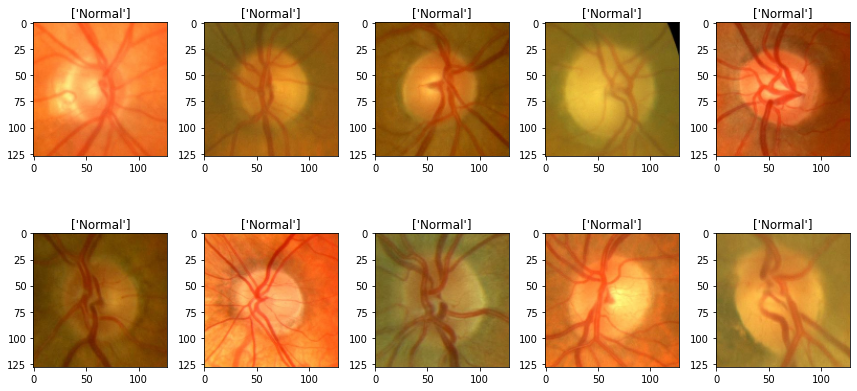

In [25]:
fig, axs = plt.subplots(2, 5, sharey= False, tight_layout = True, figsize = (12,6), facecolor = 'white')
pic = [13, 45, 23, 154, 240, 3, 123, 201, 100, 69]
k = 0
for i in range(0,2):
    for j in range(0, 5):
        n = pic[k]
        axs[i,j].imshow(X_train[n])
        axs[i,j].set(title = enc.inverse_transform(y_train)[n])
        k += 1
plt.show()

In [26]:
import keras
from keras.layers import BatchNormalization, Conv2D, SeparableConv2D, Activation, Dropout, MaxPool2D, Add, Dense
from keras.applications import Xception
import tensorflow as tf

In [27]:
inp = keras.Input(shape=(128, 128, 3))
m = (Conv2D(64, (3, 3), padding='same', activation='relu'))(inp)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
mod = (Conv2D(128, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(1024, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(1024, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(784, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(784, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(512, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(512, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])
mod = (Conv2D(256, (1, 1), strides=2))(m)
mod = (BatchNormalization())(mod)

m = (SeparableConv2D(256, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (MaxPool2D((3, 3), 2, padding='same'))(m)
m = keras.layers.Add()([m, mod])

m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (SeparableConv2D(128, (3, 3), padding='same', activation='relu'))(m)
m = (BatchNormalization())(m)
m = (Activation('linear'))(m)
m = (Dropout(0.5))(m)
m = (keras.layers.GlobalMaxPooling2D())(m)
m = (Dense(2048, activation = 'relu'))(m)
m = (Dense(2048, activation = 'relu'))(m)
m = (Dense(2, activation='softmax'))(m)

model = keras.Model(inp, m)

In [28]:
lr = 1e-4
opi = tf.keras.optimizers.Adam(lr)
model.compile(optimizer=opi, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train,batch_size=8,              
                    epochs=30,
                    verbose=1)

Epoch 1/30
71/71 [==============================] - 102s 1s/step - loss: 0.4217 - accuracy: 0.7884
Epoch 2/30
71/71 [==============================] - 102s 1s/step - loss: 0.2971 - accuracy: 0.8818
Epoch 3/30
71/71 [==============================] - 102s 1s/step - loss: 0.3179 - accuracy: 0.8801
Epoch 4/30
23/71 [========>.....................] - ETA: 1:13 - loss: 0.2644 - accuracy: 0.9130

KeyboardInterrupt: 

In [ ]:
# we predict for training dataset first
pred_labels_tr = np.array(tf.math.argmax(model.predict(X_train),axis=1))
# Predict class labels on a test data
pred_labels_te = np.array(tf.math.argmax(model.predict(X_test),axis=1))


##### Step 5 - Model Performance Summary
print('------------------------- Model Summary -------------------------')
# model.summary() # print model summary

5/5 [==============================] - 1s 168ms/step
------------------------- Model Summary -------------------------


In [ ]:
print('------------------------- Encoded Names -------------------------')
for i in range(0,len(enc.categories_[0])):
    print(i,": ",enc.categories_[0][i])
print("")

print('------------------ Evaluation on Training Data ------------------')
# Print the last value in the evaluation metrics contained within history file
for item in history.history:
    print("Final", item, ":", history.history[item][-1])
print("")
# Print classification report
print(classification_report(y_train, pred_labels_tr))
print("")


------------------------- Encoded Names -------------------------
0 :  Glaucoma
1 :  Normal

------------------ Evaluation on Training Data ------------------
Final loss : 0.03458661213517189
Final accuracy : 0.9876543283462524

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97       324
         1.0       0.94      1.00      0.97       243

    accuracy                           0.97       567
   macro avg       0.97      0.98      0.97       567
weighted avg       0.97      0.97      0.97       567




In [ ]:
print('-------------------- Evaluation on Test Data --------------------')
print(classification_report(y_test, pred_labels_te))
print("")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(accuracy_score(y_test, pred_labels_te))
print(precision_score(y_test, pred_labels_te))
print(recall_score(y_test, pred_labels_te))


-------------------- Evaluation on Test Data --------------------
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        72
         1.0       0.92      1.00      0.96        66

    accuracy                           0.96       138
   macro avg       0.96      0.96      0.96       138
weighted avg       0.96      0.96      0.96       138


0.9565217391304348
0.9166666666666666
1.0


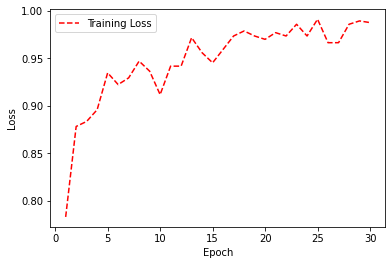

In [ ]:
training_loss = history.history['accuracy']
# test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
# plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [ ]:
from tensorflow.keras.models import load_model

model.save('content/drive/MyDrive/saved_models/')